In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = '/content/drive/MyDrive/database/train.csv'
data = pd.read_csv(data , encoding='latin1')

In [ ]:
test = '/content/drive/MyDrive/database/test.csv'
test = pd.read_csv(test , encoding='latin1')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
data.duplicated().value_counts()

False    7613
dtype: int64

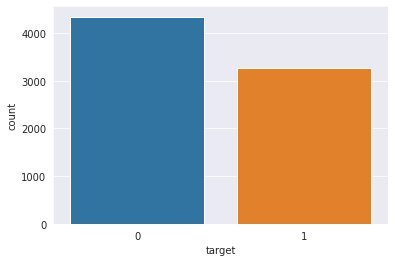

In [ ]:
sns.countplot(data["target"])

In [ ]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['target']==0)] 
df_minority = data[(data['target']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4342, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
data['target'].value_counts()

1    4342
0    4342
Name: target, dtype: int64

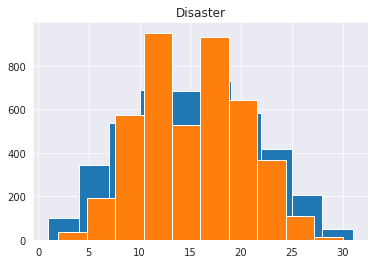

In [ ]:
# the length of each tweets and creating a function for plotting an histogram based on the length data.

def length_plot(data, name):
  length = [len(sentence.split()) for sentence in data]
  plt.hist(length)
  plt.title(name)
length_plot(data[data["target"]==0]["text"], "Not Disaster")
length_plot(data[data["target"]==1]["text"], "Disaster")

In [ ]:
#separate the dependent and independent features

X = data["text"] # indpendent feature
y = data["target"] # dependent feature
y = np.array(y)

In [ ]:
print(X.head())
print(y)

1196    'i'm a Gemini' *children screaming buildings b...
4318    The Prophet (peace be upon him) said 'Save you...
2161    Bigamist and his 'first' wife are charged in t...
6280    The Storm Prediction Center has expanded the '...
7608    Two giant cranes holding a bridge collapse int...
Name: text, dtype: object
[1 1 1 ... 0 0 0]


In [ ]:
# number of unique words present in the disaster tweets

def unq_words(sentence):
  unq_words_list = []
  for sent in tqdm(sentence):
    for word in sent.split():
      if word.lower() not in unq_words_list:
        unq_words_list.append(word.lower())
      else:
        pass
  return unq_words_list
unique_words = unq_words(X)

print("\nTotal unique words present :",len(unique_words))

100%|██████████| 8684/8684 [00:08<00:00, 1048.02it/s]


Total unique words present : 22877


In [ ]:
# Some of the words are
unique_words[:20]

["'i'm",
 'a',
 "gemini'",
 '*children',
 'screaming',
 'buildings',
 'burning',
 'police',
 'sirens',
 'in',
 'the',
 'distance*',
 'prophet',
 '(peace',
 'be',
 'upon',
 'him)',
 'said',
 "'save",
 'yourself']

In [ ]:
#find these words words starting with “#”
SYMBOL_1 = "#"
sym1_words = [word for word in unique_words if word.startswith(SYMBOL_1)]
len(sym1_words) #1965

1537

In [ ]:
# Some of the words starting with “#” are
sym1_words[200:220]

['#mh370',
 '#worldnews',
 '#notrocketscience',
 '#uswarcrimes',
 '#gbbo',
 '#fiya!',
 '#paramedic',
 '#tubestrike',
 '#respect',
 '#pantherattack',
 "#ferguson's",
 '#629',
 '#typhoon',
 '#buffalo',
 '#uknews',
 '#sacramento',
 '#foxnews',
 '#theneeds',
 '#recipes',
 '#smartnews']

In [ ]:
# words starting with “@”
SYMBOL_2 = "@"
sym2_words = [word for word in unique_words if word.startswith(SYMBOL_2)]
len(sym2_words) #2264

1859

In [ ]:
sym2_words[100:120]

['@universityoflaw',
 '@mayoroflondon',
 '@2for1lapdances',
 '@change',
 '@martinmj22',
 '@yougov',
 '@creationsbykole',
 '@weathernetwork',
 '@chowtaxis',
 '@jenniferarri_',
 '@martynwaites',
 '@news@',
 '@wocowae',
 '@rachelcaine',
 '@ohmygoshi',
 '@unsuckdcmetro',
 '@youngheroesid',
 '@cunayyh',
 '@taufikcj',
 '@yahoonews']

In [ ]:
#  remove the  urls present in it.
def url_remover(text):
    url_patterns = re.compile(r'https?://S+|www.S+')
    return url_patterns.sub(r'', text)

In [ ]:
# lower case
data['text']= data['text'].apply(lambda x: x.lower())
data.head()

,id,keyword,location,text,target
1196,1722,buildings%20burning,NaN,'i'm a gemini' *children screaming buildings b...,1
4318,6132,hellfire,NaN,the prophet (peace be upon him) said 'save you...,1
2161,3101,deaths,"ÃÃT: 10.614817868480726,12.195582811791382",bigamist and his 'first' wife are charged in t...,1
6280,8971,storm,"Raleigh, NC",the storm prediction center has expanded the '...,1
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1


In [ ]:
data['text'] = data['text'].str.replace('[#,@,&]', '')
data.head()

,id,keyword,location,text,target
1196,1722,buildings%20burning,NaN,'i'm a gemini' *children screaming buildings b...,1
4318,6132,hellfire,NaN,the prophet (peace be upon him) said 'save you...,1
2161,3101,deaths,"ÃÃT: 10.614817868480726,12.195582811791382",bigamist and his 'first' wife are charged in t...,1
6280,8971,storm,"Raleigh, NC",the storm prediction center has expanded the '...,1
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1


In [ ]:
import nltk

  
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,id,keyword,location,text,target
1196,1722,buildings%20burning,NaN,'i'm gemini' *children screaming buildings bur...,1
4318,6132,hellfire,NaN,prophet (peace upon him) said 'save hellfire e...,1
2161,3101,deaths,"ÃÃT: 10.614817868480726,12.195582811791382",bigamist 'first' wife charged deaths 'second' ...,1
6280,8971,storm,"Raleigh, NC",storm prediction center expanded 'slight risk'...,1
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1


In [ ]:
data.isnull().sum()

id             0
keyword       99
location    2972
text           0
target         0
dtype: int64

In [ ]:
data.dropna(subset=['keyword'])

,id,keyword,location,text,target
1196,1722,buildings%20burning,NaN,'i'm gemini' *children screaming buildings bur...,1
4318,6132,hellfire,NaN,prophet (peace upon him) said 'save hellfire e...,1
2161,3101,deaths,"ÃÃT: 10.614817868480726,12.195582811791382",bigamist 'first' wife charged deaths 'second' ...,1
6280,8971,storm,"Raleigh, NC",storm prediction center expanded 'slight risk'...,1
3564,5095,famine,Ireland,i've experienced smell rotting potatoes first ...,1
...,...,...,...,...,...
7578,10830,wrecked,NaN,jt_ruff23 cameronhacker wrecked,0
7579,10831,wrecked,"Vancouver, Canada",three days work they've pretty much wrecked ha...,0
7580,10832,wrecked,London,fx forex trading cramer: iger's 3 words wrecke...,0
7581,10833,wrecked,Lincoln,engineshed great atmosphere british lion gig t...,0


In [ ]:
!pip install word2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 750 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=156432 sha256=6bedfa0581cbb3b48dbba8522e2c066618c1ff5b772db52ad70829d886e4d3da
  Stored in directory: /root/.cache/pip/wheels/d9/b0/11/87d7a6c76458790285839bd80e87ddc52dc4108f0063f24307
Successfully built word2vec


In [ ]:
import gensim.models.keyedvectors as word2vec
w2vModel = word2vec.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True, limit=50000)

In [ ]:
w2vModel.most_similar('cyclone',topn=5)

[('typhoon', 0.6971927881240845),
 ('hurricane', 0.6483842134475708),
 ('tropical_storm', 0.6254907846450806),
 ('storm', 0.6225177049636841),
 ('tsunami', 0.592627227306366)]

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)  

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
#length of tweet to consider
maxlentweet = 30
#add padding
X = pad_sequences(X, maxlen=maxlentweet)

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0], 
                            input_length=X.shape[1])

In [ ]:
# first layer is a word embedding layer followed LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Dense, Flatten, GlobalMaxPool1D, Dropout, BatchNormalization
lstm_model = Sequential()
lstm_model.add(embedding_layer)
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(200, dropout = 0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation = "sigmoid"))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.1, random_state = 42)

In [ ]:
X_train

array([[    0,     0,     0, ...,     1,     2,  3522],
       [    0,     0,     0, ...,   292,   145,   292],
       [    0,     0,     0, ...,     1,     2,  6923],
       ...,
       [    0,     0,     0, ...,     1,     2, 11364],
       [    0,     0,     0, ...,     2,  3428,   239],
       [    0,     0,     0, ...,  5867,     5, 15692]], dtype=int32)

In [ ]:
Y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Creating the model and getting the model summary
BATCH_SIZE = 20
EPOCHS = 5

lstm_model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

# train model
history = lstm_model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/5
391/391 [==============================] - 136s 338ms/step - loss: 0.4075 - accuracy: 0.8091 - val_loss: 0.2160 - val_accuracy: 0.9229
Epoch 2/5
391/391 [==============================] - 124s 317ms/step - loss: 0.1367 - accuracy: 0.9505 - val_loss: 0.1660 - val_accuracy: 0.9505
Epoch 3/5
391/391 [==============================] - 124s 318ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.2189 - val_accuracy: 0.9505
Epoch 4/5
391/391 [==============================] - 123s 314ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.2044 - val_accuracy: 0.9551
Epoch 5/5
391/391 [==============================] - 125s 320ms/step - loss: 0.0160 - accuracy: 0.9942 - val_loss: 0.2810 - val_accuracy: 0.9264


In [ ]:
# evaluate model
score = lstm_model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

44/44 [==============================] - 1s 25ms/step - loss: 0.2810 - accuracy: 0.9264
Test loss: 0.2810155749320984
Test accuracy: 0.9263521432876587


In [ ]:
# save model
lstm_model.save('/content/drive/MyDrive/database/lstm_model')

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
predicted = lstm_model.predict(X_test, verbose=1, batch_size=100)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = lstm_model.evaluate(X_test, Y_test, batch_size=100)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(Y_test), y_predicted))

9/9 [==============================] - 1s 91ms/step - loss: 0.2810 - accuracy: 0.9264
Test Accuracy:  0.9263521432876587
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       437
           1       0.90      0.96      0.93       432

    accuracy                           0.93       869
   macro avg       0.93      0.93      0.93       869
weighted avg       0.93      0.93      0.93       869



In [ ]:
lstm_pred=(lstm_model.predict(X_test) > 0.5).astype("int32")

28/28 [==============================] - 1s 46ms/step


In [ ]:
print('predicted:', lstm_pred[0:5])
print('test set :', Y_test[0:5])

predicted: [[1]
 [1]
 [1]
 [1]
 [1]]
test set : [1 1 1 1 1]


In [ ]:
def clean_text(text):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    stop_words = set(stopwords.words('english'))
    word = [word for word in text.split() if word not in (stop_words)]
    return " ".join(word)

from keras.models import load_model
# decode score prediction from the model, to be 0 or 1
def decode_prediction(prediction):
    return 'Relevent' if prediction > 0.5 else 'Non-relevant'

# load model
model = load_model('/content/drive/MyDrive/database/lstm_model')
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# test model with a new query
#tweet = "how are you"
tweet = 'there is a typhoon and this is bad'

# clean query text
input_text = clean_text(tweet)
# tokenize and pad query test as in training
input_text = pad_sequences(tokenizer.texts_to_sequences([input_text]),
                        maxlen = 30)

# get model prediction
prediction = model.predict([input_text])[0]
# get decode prediction
label = decode_prediction(prediction)

print("Tweet: \n\n{}\n".format(tweet))
print("Score: {} Label: {}".format(prediction, label))

1/1 [==============================] - 0s 432ms/step
Tweet: 

there is a typhoon and this is bad

Score: [0.9577084] Label: Relevent


##CNN

In [ ]:
 from keras import layers 
 cnnmodel = Sequential()
 cnnmodel.add(embedding_layer)
 cnnmodel.add(layers.Conv1D(filters=16, kernel_size= 2, activation='relu'))
 cnnmodel.add(layers.GlobalMaxPooling1D())
 cnnmodel.add(layers.Dense(10, activation='relu'))
 cnnmodel.add(layers.Dense(1, activation='sigmoid'))
 cnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
 cnnmodel.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           15000000  
                                                                 
 conv1d (Conv1D)             (None, 29, 16)            9616      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,009,797
Trainable params: 15,009,797
Non-trainable params: 0
__________________________________________

In [ ]:
cnnmodel.fit(X_train, Y_train,
                     epochs=1,
                     verbose=False,
                     validation_data=(X_test, Y_test),
                     batch_size=10)

In [ ]:
loss, accuracy = cnnmodel.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Testing Accuracy:  0.9241


In [ ]:
preds_cnn = (cnnmodel.predict(X_test) > 0.5).astype("int32")

28/28 [==============================] - 0s 9ms/step


In [ ]:
print('predicted:', preds_cnn[0:5])
print('test set :', Y_test[0:5])

predicted: [[1]
 [1]
 [1]
 [1]
 [1]]
test set : [1 1 1 1 1]


In [ ]:
model.save('/content/drive/MyDrive/database/cnnmodel')

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
predicted = cnnmodel.predict(X_test, verbose=1, batch_size=100)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = cnnmodel.evaluate(X_test, Y_test, batch_size=100)
print(metrics.classification_report(list(Y_test), y_predicted))

9/9 [==============================] - 0s 8ms/step - loss: 0.1970 - accuracy: 0.9241
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       437
           1       0.89      0.96      0.93       432

    accuracy                           0.92       869
   macro avg       0.93      0.92      0.92       869
weighted avg       0.93      0.92      0.92       869



In [ ]:
 cnnmodel2 = Sequential()
 cnnmodel2.add(embedding_layer)
 cnnmodel2.add(layers.Conv1D(filters = 16, kernel_size =2, activation='relu'))
 cnnmodel2.add(layers.GlobalMaxPooling1D())
 cnnmodel2.add(layers.Dense(10, activation='relu'))
 cnnmodel2.add(layers.Dense(1, activation='sigmoid'))
 cnnmodel2.compile(optimizer='adagrad',
               loss='binary_crossentropy',
               metrics=['accuracy'])
 cnnmodel2.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           15000000  
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 16)            9616      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,009,797
Trainable params: 15,009,797
Non-trainable params: 0
__________________________________________

In [ ]:
cnnmodel2.fit(X_train, Y_train,
                     epochs=2,
                     verbose=False,
                     validation_data=(X_test, Y_test),
                     batch_size=50)

In [ ]:
loss, accuracy = cnnmodel2.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Testing Accuracy:  0.5662


In [ ]:
model.save('/content/drive/MyDrive/database/cnnmodel2')

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
predicted = cnnmodel2.predict(X_test, verbose=1, batch_size=100)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = cnnmodel2.evaluate(X_test, Y_test, batch_size=100)
print(metrics.classification_report(list(Y_test), y_predicted))

9/9 [==============================] - 0s 11ms/step - loss: 0.6650 - accuracy: 0.5489
              precision    recall  f1-score   support

           0       0.89      0.12      0.21       437
           1       0.52      0.99      0.68       432

    accuracy                           0.55       869
   macro avg       0.71      0.55      0.45       869
weighted avg       0.71      0.55      0.44       869



In [ ]:
def clean_text(text):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    
    return " ".join(tokens)

from keras.models import load_model
# decode score prediction from the model, to be 0 or 1
def decode_prediction(prediction):
    return 'Relevent' if prediction > 0.5 else 'Non-relevant'

# load model
model = load_model('/content/drive/MyDrive/database/cnnmodel2')
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# test model with a new query
#tweet = "Typhoon Soudelor kills 28 in China and Taiwan"
tweet = 'hellooo'

# clean query text
input_text = clean_text(tweet)
# tokenize and pad query test as in training
input_text = pad_sequences(tokenizer.texts_to_sequences([input_text]),
                        maxlen = 30)

# get model prediction
prediction = cnnmodel.predict([input_text])[0]
# get decode prediction
label = decode_prediction(prediction)

print("Tweet: \n\n{}\n".format(tweet))
print("Score: {} Label: {}".format(prediction, label))

1/1 [==============================] - 0s 22ms/step
Tweet: 

hellooo

Score: [0.3203251] Label: Non-relevant


In [ ]:
def clean_text(text):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    
    return " ".join(tokens)

from keras.models import load_model
# decode score prediction from the model, to be 0 or 1
def decode_prediction(prediction):
    return 'Relevent' if prediction > 0.5 else 'Non-relevant'

# load model
model = load_model('/content/drive/MyDrive/database/cnnmodel')
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# test model with a new query
#tweet = "We are still living in the aftershock of Hiroshima people are still the scars of history"
tweet = 'earthquake here'

# clean query text
input_text = clean_text(tweet)
# tokenize and pad query test as in training
input_text = pad_sequences(tokenizer.texts_to_sequences([input_text]),
                        maxlen = 30)

# get model prediction
prediction = cnnmodel2.predict([input_text])[0]
# get decode prediction
label = decode_prediction(prediction)

print("Tweet: \n\n{}\n".format(tweet))
print("Score: {} Label: {}".format(prediction, label))

1/1 [==============================] - 0s 26ms/step
Tweet: 

earthquake here

Score: [0.5019961] Label: Relevent


##RNN

In [ ]:
# define the model
from tensorflow.keras.layers import SimpleRNN
model4 = Sequential()
model4.add(embedding_layer)
model4.add(SimpleRNN(24,return_sequences=False))
model4.add(Dense(1, activation='sigmoid'))

# compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           15000000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 24)                7800      
                                                                 
 dense_6 (Dense)             (None, 1)                 25        
                                                                 
Total params: 15,007,825
Trainable params: 15,007,825
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model
model4.fit(X_train,
         Y_train,
         epochs=7,
         validation_data=(X_test, Y_test), verbose=1,
         batch_size = 10
         )

Epoch 1/7
782/782 [==============================] - 179s 225ms/step - loss: 0.1002 - accuracy: 0.9629 - val_loss: 0.1641 - val_accuracy: 0.9620
Epoch 2/7
782/782 [==============================] - 162s 207ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.2166 - val_accuracy: 0.9310
Epoch 3/7
782/782 [==============================] - 164s 210ms/step - loss: 0.0146 - accuracy: 0.9962 - val_loss: 0.2358 - val_accuracy: 0.9241
Epoch 4/7
782/782 [==============================] - 163s 208ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.2130 - val_accuracy: 0.9517
Epoch 5/7
782/782 [==============================] - 163s 208ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.2323 - val_accuracy: 0.9482
Epoch 6/7
782/782 [==============================] - 162s 208ms/step - loss: 0.0109 - accuracy: 0.9955 - val_loss: 0.3161 - val_accuracy: 0.8941
Epoch 7/7
782/782 [==============================] - 162s 207ms/step - loss: 0.0092 - accuracy: 0.9965 - val_loss: 0.2648 - val_ac

In [ ]:
preds = (model4.predict(X_test) > 0.5).astype("int32")

28/28 [==============================] - 0s 7ms/step


In [ ]:
print('predicted:', preds[0:5])
print('test set :', Y_test[0:5])

predicted: [[1]
 [1]
 [1]
 [1]
 [1]]
test set : [1 1 1 1 1]


In [ ]:
loss, accuracy = model4.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Testing Accuracy:  0.9379


In [ ]:
model.save("/content/drive/MyDrive/database/model4")

In [ ]:
def clean_text(text):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    
    return " ".join(tokens)

from keras.models import load_model
# decode score prediction from the model, to be 0 or 1
def decode_prediction(prediction):
    return 'Relevent' if prediction > 0.5 else 'Non-relevant'

# load model
model = load_model('/content/drive/MyDrive/database/model4')
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# test model with a new query
#tweet = "I'm on top of the hill and I can see a fire in the woods"
tweet = 'heyy how are you'

# clean query text
input_text = clean_text(tweet)
# tokenize and pad query test as in training
input_text = pad_sequences(tokenizer.texts_to_sequences([input_text]),
                        maxlen = 30)

# get model prediction
prediction = model4.predict([input_text])[0]
# get decode prediction
label = decode_prediction(prediction)

print("Tweet: \n\n{}\n".format(tweet))
print("Score: {} Label: {}".format(prediction, label))

1/1 [==============================] - 0s 21ms/step
Tweet: 

heyy how are you

Score: [0.01455218] Label: Non-relevant
